<a href="https://colab.research.google.com/github/Solstice302/CodSoft_Tasks/blob/main/CodSoft_Task1_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

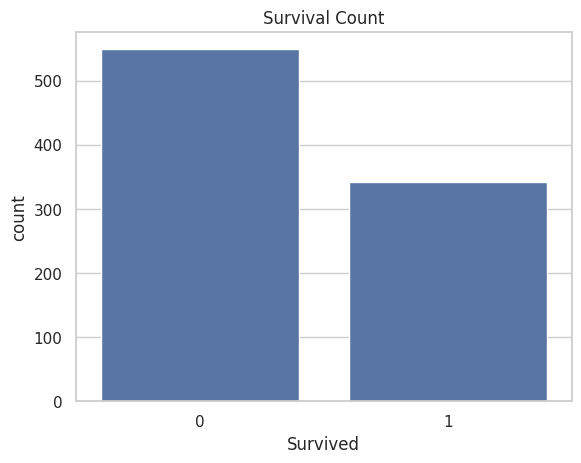

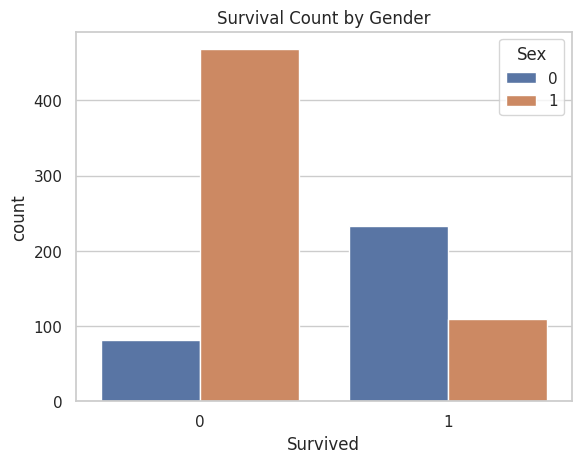

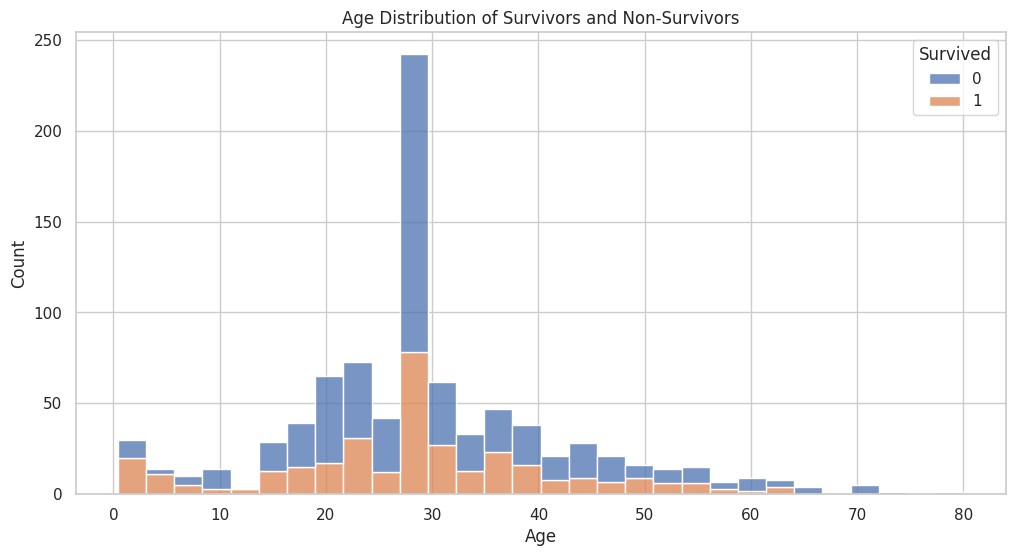

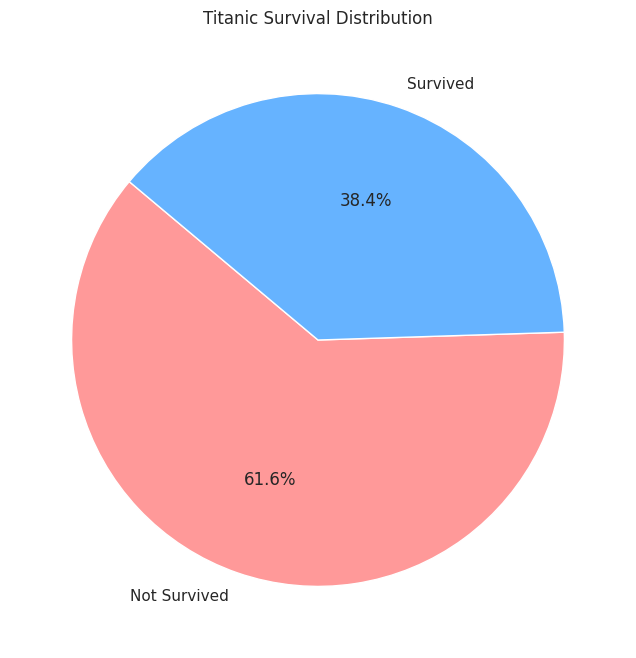

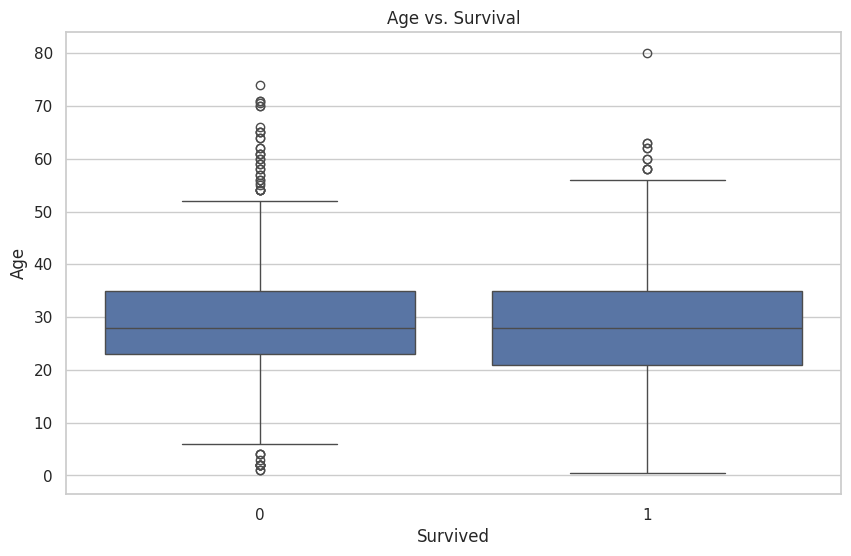

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



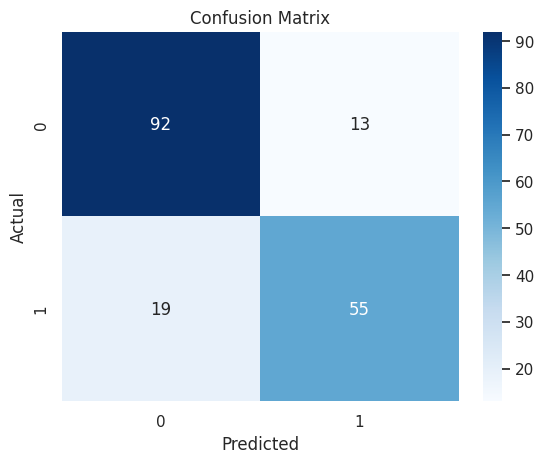

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Display settings
sns.set(style="whitegrid")

# Load dataset
titanic_data = pd.read_csv('/content/Titanic-Dataset (1).csv')

# Display the first few rows of the dataset
print(titanic_data.head())

# Display summary statistics of the dataset
print(titanic_data.describe())

# Display information about the dataset
print(titanic_data.info())

# Check for missing values
print(titanic_data.isnull().sum())

# Fill missing Age values with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Fill missing Embarked values with the most common port
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column as it has too many missing values
titanic_data.drop('Cabin', axis=1, inplace=True)

# Verify that there are no missing values left
print(titanic_data.isnull().sum())

# Convert categorical features to numeric
label_encoder = LabelEncoder()

titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

# Display the first few rows of the updated dataset
print(titanic_data.head())

# Plot the count of survivors and non-survivors
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count')
plt.show()

# Plot survival rate by gender
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.title('Survival Count by Gender')
plt.show()

# Plot age distribution of survivors and non-survivors
plt.figure(figsize=(12, 6))
sns.histplot(data=titanic_data, x='Age', hue='Survived', multiple='stack')
plt.title('Age Distribution of Survivors and Non-Survivors')
plt.show()

# Count the number of survivors and non-survivors
survival_counts = titanic_data['Survived'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Titanic Survival Distribution')
plt.show()

# Age vs. Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=titanic_data)
plt.title('Age vs. Survival')
plt.show()

# Select relevant features for the model
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic_data[features]
y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display the classification report
print(classification_report(y_test, y_pred))

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()